In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


***[2-1]***

In [2]:
df = pd.read_excel("EconomicIndicators2019.xlsx")

In [3]:
df

,No,Country,Continent,LifeExpect,GDPPC,MfgMn$,AgriMn$,CO2kt,HealthPC$,Pop_mn
0,1,Afghanistan,Asia,63.565,500.522981,1331.48,4872.44,11238.83,74.234104,37.77
1,2,Albania,Europe,79.282,5396.214227,963.57,2832.29,4993.30,NaN,2.85
2,3,Algeria,Africa,76.474,4021.983608,40980.38,21189.60,170582.40,250.560776,42.71
3,4,Angola,Africa,62.448,2142.238757,4253.81,5463.38,24382.90,69.379341,32.35
4,5,Antigua and Barbuda,North America,78.691,18187.779712,37.48,29.25,509.00,801.543823,0.09
...,...,...,...,...,...,...,...,...,...,...
172,173,Uzbekistan,Asia,71.344,1795.201768,10575.35,14698.22,117687.80,98.587418,33.58
173,174,Vietnam,Asia,74.093,3491.091279,79534.52,39403.36,341716.80,173.650452,95.78
174,175,West Bank and Gaza,Asia,75.241,3656.858271,1924.90,1208.60,NaN,NaN,4.69
175,176,Zambia,Africa,62.793,1268.120941,1582.41,666.81,7615.70,67.457771,18.38


In [4]:
#find out the missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   No          177 non-null    int64  
 1   Country     177 non-null    object 
 2   Continent   177 non-null    object 
 3   LifeExpect  177 non-null    float64
 4   GDPPC       177 non-null    float64
 5   MfgMn$      177 non-null    float64
 6   AgriMn$     177 non-null    float64
 7   CO2kt       167 non-null    float64
 8   HealthPC$   164 non-null    float64
 9   Pop_mn      177 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 14.0+ KB


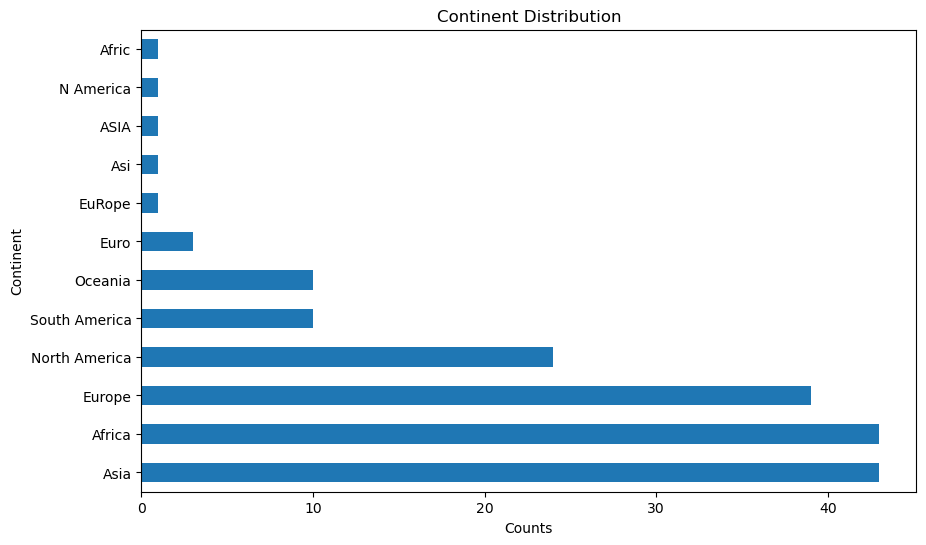

In [5]:
#see unique values and their counts for the 'Continent' column
continent_counts = df['Continent'].value_counts()

plt.figure(figsize=(10, 6))
continent_counts.plot(kind="barh")
plt.title("Continent Distribution")
plt.xlabel("Counts")
plt.ylabel("Continent")
plt.show()

In [6]:
df["Continent"] = df["Continent"].replace({
    'Afric': 'Africa',
    'N America': 'North America',
    'ASIA': 'Asia',
    'Asi': 'Asia',
    'EuRope': 'Europe',
    'Euro': 'Europe'
})

In [7]:
#deal with the missing data of CO2kt column
continent_mean_CO2kt = df.groupby('Continent')['CO2kt'].transform('mean')
df['CO2kt'] = df['CO2kt'].fillna(continent_mean_CO2kt)

In [8]:
#Insert specific values into specified rows
specific_values = {'Albania': 367.76, 'Saudi Arabia': 1279.69}
for country, value in specific_values.items():
    df.loc[df['Country'] == country, 'HealthPC$'] = value

In [9]:
#deal with the rest of missing data of Health PC$ column
continent_mean_HealthPC = df.groupby('Continent')['HealthPC$'].transform('mean')
df['HealthPC$'].fillna(continent_mean_HealthPC, inplace=True)

In [10]:
#the final result of dateset (without any missing data)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   No          177 non-null    int64  
 1   Country     177 non-null    object 
 2   Continent   177 non-null    object 
 3   LifeExpect  177 non-null    float64
 4   GDPPC       177 non-null    float64
 5   MfgMn$      177 non-null    float64
 6   AgriMn$     177 non-null    float64
 7   CO2kt       177 non-null    float64
 8   HealthPC$   177 non-null    float64
 9   Pop_mn      177 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 14.0+ KB


In [11]:
df.to_excel('EconomicIndicators2019_cleaned.xlsx', index=False)

***[2-2]***

In [17]:
#read file
data_2019 = pd.read_excel("EconomicIndicators2019_cleaned.xlsx")
data_2020 = pd.read_excel("EconomicIndicators2020.xlsx")

In [18]:
#datapreprocessing
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   No          177 non-null    int64  
 1   Country     177 non-null    object 
 2   Continent   177 non-null    object 
 3   LifeExpect  177 non-null    float64
 4   GDPPC       177 non-null    float64
 5   MfgMn$      177 non-null    float64
 6   AgriMn$     177 non-null    float64
 7   CO2kt       167 non-null    float64
 8   HealthPC$   164 non-null    float64
 9   Pop_mn      177 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 14.0+ KB


In [20]:
#fill NA values in CO2kt column
continent_mean_CO2kt = data_2020.groupby('Continent')['CO2kt'].transform('mean')
data_2020['CO2kt'] = data_2020['CO2kt'].fillna(continent_mean_CO2kt)

In [21]:
#Insert specific values into specified rows
specific_values = {'Albania': 396.88, 'Saudi Arabia': 1355.72}
for country, value in specific_values.items():
    data_2020.loc[data_2020['Country'] == country, 'HealthPC$'] = value

In [22]:
#deal with the rest of missing data of Health PC$ column
continent_mean_HealthPC = data_2020.groupby('Continent')['HealthPC$'].transform('mean')
data_2020['HealthPC$'].fillna(continent_mean_HealthPC, inplace=True)

In [35]:
data_2020.info()

<class 'pandas.core.frame.DataFrame'>
Index: 177 entries, Afghanistan to Zimbabwe
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   No          177 non-null    int64  
 1   Continent   177 non-null    object 
 2   LifeExpect  177 non-null    float64
 3   GDPPC       177 non-null    float64
 4   MfgMn$      177 non-null    float64
 5   AgriMn$     177 non-null    float64
 6   CO2kt       177 non-null    float64
 7   HealthPC$   177 non-null    float64
 8   Pop_mn      177 non-null    float64
dtypes: float64(7), int64(1), object(1)
memory usage: 13.8+ KB


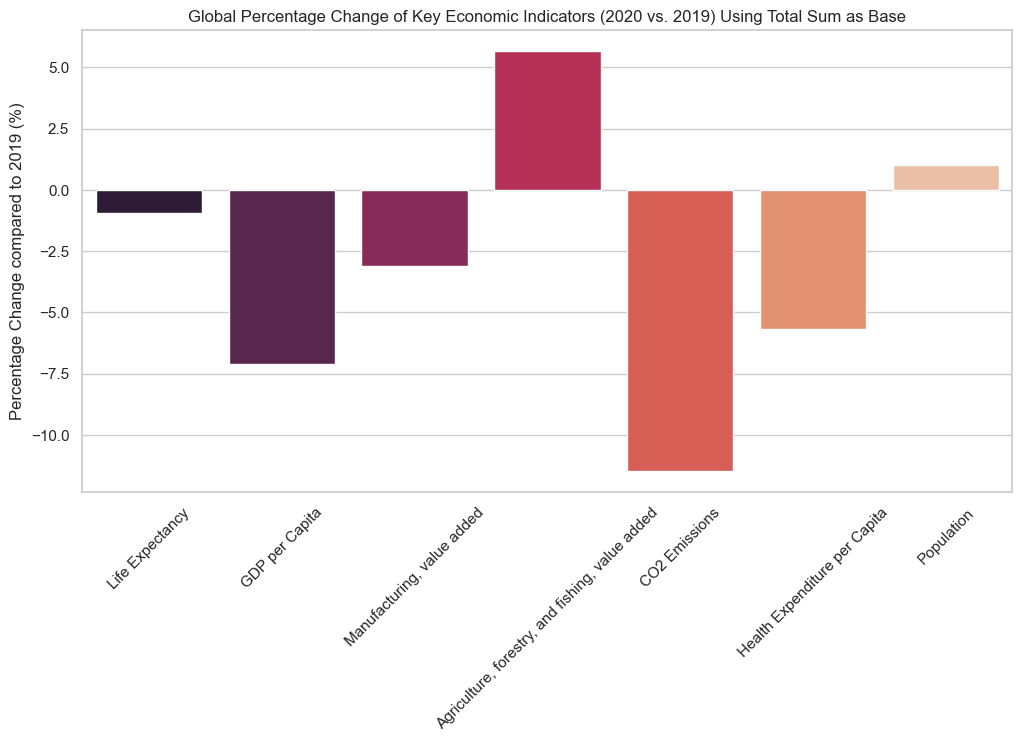

In [81]:
# Redefining the indicators list for clarity
indicators = ['Life Expectancy', 'GDP per Capita', 'Manufacturing, value added', 'Agriculture, forestry, and fishing, value added', 
              'CO2 Emissions', 'Health Expenditure per Capita', 'Population']

# Calculating the global sum for each indicator for both years
global_sum_2019 = data_2019[['LifeExpect', 'GDPPC', 'MfgMn$', 'AgriMn$', 'CO2kt', 'HealthPC$', 'Pop_mn']].sum()
global_sum_2020 = data_2020[['LifeExpect', 'GDPPC', 'MfgMn$', 'AgriMn$', 'CO2kt', 'HealthPC$', 'Pop_mn']].sum()

# Calculating the percentage change for each indicator using the sum for 2019 as the base
percentage_change_sum_base_2019 = ((global_sum_2020 - global_sum_2019) / global_sum_2019) * 100

# Preparing data for plotting using sum as the base for 2019
percentage_change_values_sum_base_2019 = percentage_change_sum_base_2019.values

# Plotting the bar chart using sum as the base for 2019
plt.figure(figsize=(12, 6))
sns.barplot(x=indicators, y=percentage_change_values_sum_base_2019, palette="rocket")
plt.title('Global Percentage Change of Key Economic Indicators (2020 vs. 2019) Using Total Sum as Base')
plt.ylabel('Percentage Change compared to 2019 (%)')
plt.xticks(rotation=45)
plt.show()

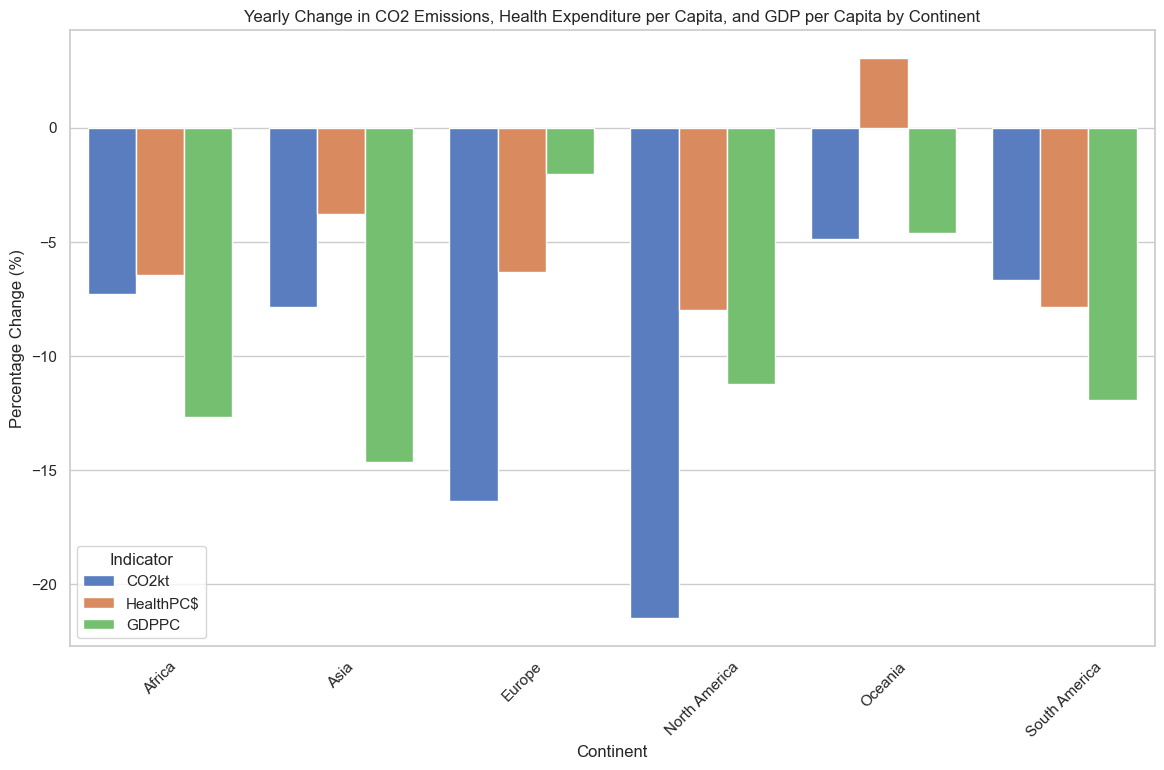

In [84]:
# First, we need to group the data by continent and calculate the sums for 2019 and 2020
continent_sum_2019 = data_2019.groupby('Continent').sum()[['CO2kt', 'HealthPC$', 'GDPPC']]
continent_sum_2020 = data_2020.groupby('Continent').sum()[['CO2kt', 'HealthPC$', 'GDPPC']]

# Now, we calculate the percentage change for each continent and each of the three indicators
continent_percentage_change = ((continent_sum_2020 - continent_sum_2019) / continent_sum_2019) * 100

# Resetting index to have "Continent" as a column for easier plotting
continent_percentage_change = continent_percentage_change.reset_index()

# Set the style for Seaborn
sns.set(style="whitegrid")

# Create a figure and axes
plt.figure(figsize=(14, 8))

# Melt the DataFrame for easier plotting
melted_data = pd.melt(continent_percentage_change, id_vars='Continent', var_name='Indicator', value_name='Percentage Change')

# Create a grouped bar plot using Seaborn
sns.barplot(data=melted_data, x='Continent', y='Percentage Change', hue='Indicator', palette='muted')

# Adding labels and title
plt.xlabel('Continent')
plt.ylabel('Percentage Change (%)')
plt.title('Yearly Change in CO2 Emissions, Health Expenditure per Capita, and GDP per Capita by Continent')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adding a legend
plt.legend(title="Indicator")

# Displaying the plot
plt.show()

C:\Users\Ruby Cheng\AppData\Local\Temp\ipykernel_32752\1392800725.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  north_america_data_2019['CO2kt_change'] = north_america_data_2020['CO2kt'] - north_america_data_2019['CO2kt']


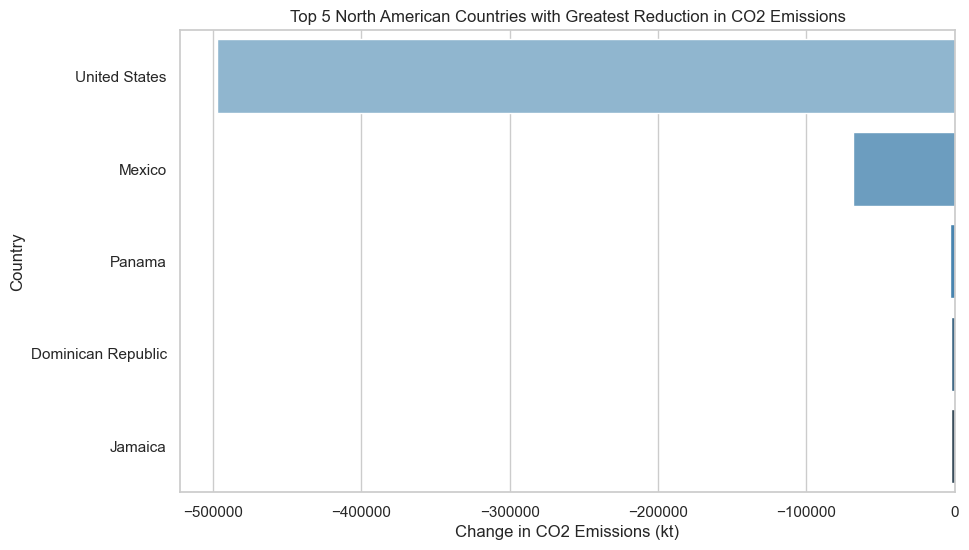

In [94]:
# Filter the data for North America
north_america_data_2019 = data_2019[data_2019['Continent'] == 'North America']
north_america_data_2020 = data_2020[data_2020['Continent'] == 'North America']

# Calculate the absolute change in CO2 emissions for each country in North America
north_america_data_2019['CO2kt_change'] = north_america_data_2020['CO2kt'] - north_america_data_2019['CO2kt']

# Now, find the top 5 countries in North America with the most decrease in CO2 emissions
top_5_countries_CO2_reduction = north_america_data_2019[['Country', 'CO2kt_change']].sort_values(by='CO2kt_change').head(5)

# Plotting the top 5 countries with seaborn
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='CO2kt_change', y='Country', data=top_5_countries_CO2_reduction, palette='Blues_d')

# Set the title and labels of the plot
plt.title('Top 5 North American Countries with Greatest Reduction in CO2 Emissions')
plt.xlabel('Change in CO2 Emissions (kt)')
plt.ylabel('Country')

# Show the plot
plt.show()


C:\Users\Ruby Cheng\AppData\Local\Temp\ipykernel_32752\659981772.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oceania_data_2019['HealthPC$_change'] = oceania_data_2020['HealthPC$'] - oceania_data_2019['HealthPC$']


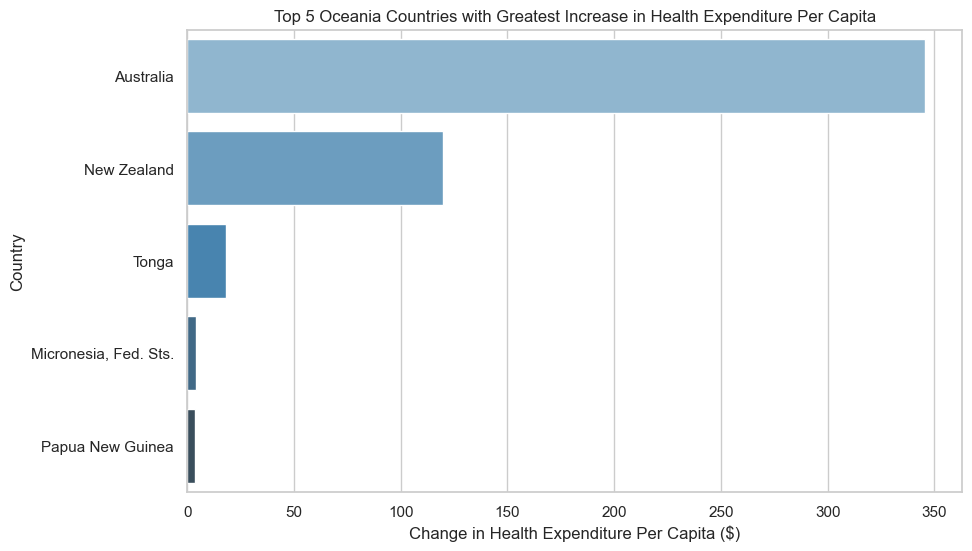

In [95]:
# Filter the data for Oceania
oceania_data_2019 = data_2019[data_2019['Continent'] == 'Oceania']
oceania_data_2020 = data_2020[data_2020['Continent'] == 'Oceania']

# Calculate the absolute change in Health Expenditure per Capita for each country in Oceania
oceania_data_2019['HealthPC$_change'] = oceania_data_2020['HealthPC$'] - oceania_data_2019['HealthPC$']

# Now, find the top 5 countries in Oceania with the most increase in Health Expenditure per Capita
top_5_countries_HealthPC_increase = oceania_data_2019[['Country', 'HealthPC$_change']].sort_values(by='HealthPC$_change', ascending=False).head(5)

# Plotting the top 5 countries with seaborn
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='HealthPC$_change', y='Country', data=top_5_countries_HealthPC_increase, palette='Blues_d')

# Set the title and labels of the plot
plt.title('Top 5 Oceania Countries with Greatest Increase in Health Expenditure Per Capita')
plt.xlabel('Change in Health Expenditure Per Capita ($)')
plt.ylabel('Country')

# Show the plot
plt.show()

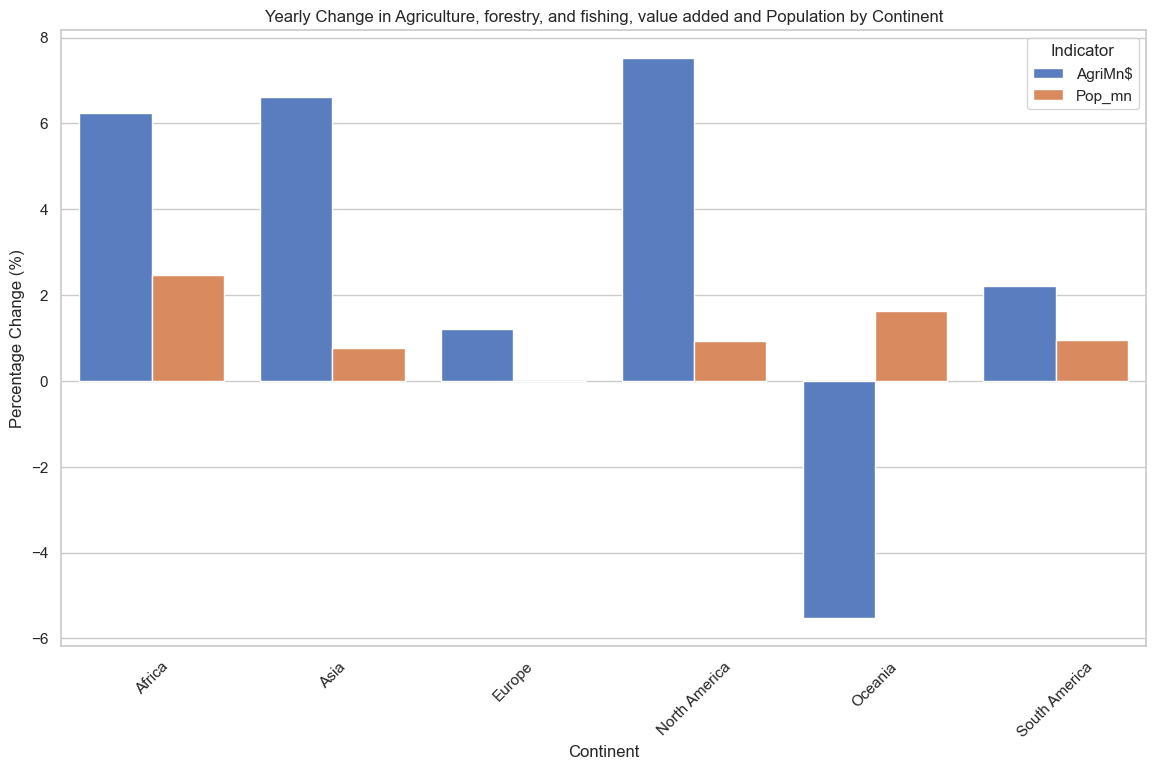

In [98]:
# Group the data by continent and calculate the sums for 2019 and 2020 for AgriMn$ and Pop_mn
continent_sum_2019 = data_2019.groupby('Continent').sum()[['AgriMn$', 'Pop_mn']]
continent_sum_2020 = data_2020.groupby('Continent').sum()[['AgriMn$', 'Pop_mn']]

# Calculate the percentage change for each continent for AgriMn$ and Pop_mn
continent_percentage_change = ((continent_sum_2020 - continent_sum_2019) / continent_sum_2019) * 100

# Resetting index to have "Continent" as a column for easier plotting
continent_percentage_change = continent_percentage_change.reset_index()

# Set the style for Seaborn
sns.set(style="whitegrid")

# Create a figure and axes
plt.figure(figsize=(14, 8))

# Melt the DataFrame for easier plotting
melted_data = pd.melt(continent_percentage_change, id_vars='Continent', var_name='Indicator', value_name='Percentage Change')

# Create a grouped bar plot using Seaborn
sns.barplot(data=melted_data, x='Continent', y='Percentage Change', hue='Indicator', palette='muted')

# Adding labels and title
plt.xlabel('Continent')
plt.ylabel('Percentage Change (%)')
plt.title('Yearly Change in Agriculture, forestry, and fishing, value added and Population by Continent')

# Rotate the x-axis labels for better readability
plt.xticks(rotation=45)

# Adding a legend
plt.legend(title="Indicator")

# Displaying the plot
plt.show()


C:\Users\Ruby Cheng\AppData\Local\Temp\ipykernel_32752\475183823.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  north_america_data_2019['AgriMn$_change'] = north_america_data_2020['AgriMn$'] - north_america_data_2019['AgriMn$']


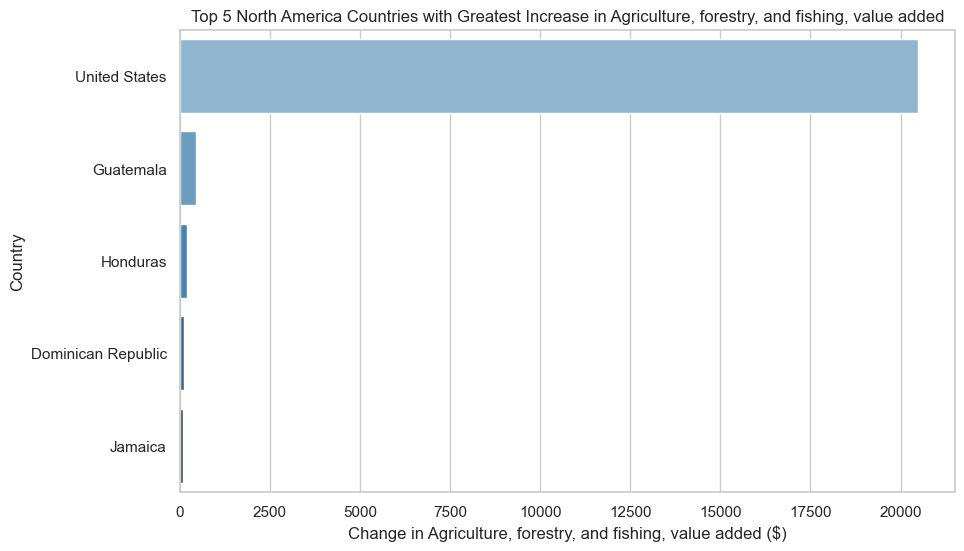

In [100]:
# Filter the data for North America
north_america_data_2019 = data_2019[data_2019['Continent'] == 'North America']
north_america_data_2020 = data_2020[data_2020['Continent'] == 'North America']

# Calculate the absolute change in Agriculture, forestry, and fishing, value added for each country in North America
north_america_data_2019['AgriMn$_change'] = north_america_data_2020['AgriMn$'] - north_america_data_2019['AgriMn$']

# Now, find the top 5 countries in North America with the greatest increase in Agriculture, forestry, and fishing, value added
top_5_countries_AgriMn_increase = north_america_data_2019[['Country', 'AgriMn$_change']].sort_values(by='AgriMn$_change', ascending=False).head(5)

# Plotting the top 5 countries with seaborn
plt.figure(figsize=(10, 6))
barplot = sns.barplot(x='AgriMn$_change', y='Country', data=top_5_countries_AgriMn_increase, palette='Blues_d')

# Set the title and labels of the plot
plt.title('Top 5 North American Countries with the Greatest Increase in Agriculture, forestry, and fishing, value added')
plt.xlabel('Change in Agriculture, forestry, and fishing, value added ($)')
plt.ylabel('Country')

# Show the plot
plt.show()